## An end-to-end example

* Download our Data
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

# Download and Precprocess the Data


This dataset has been taken from food101 dataset. which is dataset of 101 food classes. however, we've modified to only 2 classes.

In [ ]:
import zipfile

# Download the zip file to google colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-10-11 10:52:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  18.3MB/s    in 6.6s    

2023-10-11 10:52:34 (15.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

In [ ]:
!ls pizza_steak # List the file in pizza_steaka

test  train


In [ ]:
!ls pizza_steak/train/ # Files in the pizza_steak/train folder

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct 11 10:52 .
drwxr-xr-x 1 root root 4096 Oct 11 10:52 ..
drwxr-xr-x 4 root root 4096 Oct 11 10:52 test
drwxr-xr-x 4 root root 4096 Oct 11 10:52 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmaticaly
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names from subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img


['1778167.jpg']
Image shape: (512, 512, 3)


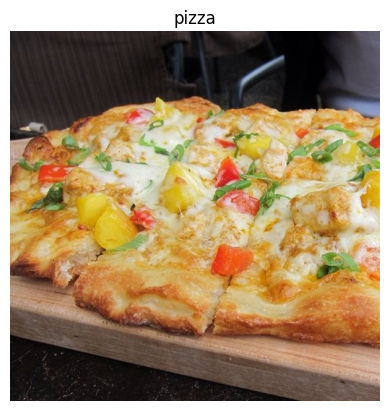

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
print(img.shape)

(512, 512, 3)


## Preprocess the Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random seed
tf.random.set_seed(42)
# Preprocessing data (Get all of the pixels vals bw 0 & 1, also ka normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our training data
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import Data from dirs and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Turning data into **Batches**.

A batch is small subset of data. Rather than looking at all the data at a time, our model might look at a small batch.

1. 10,000 or more images might not fit into the memory your processor (GPU).
2. Trying to look at 10,000 images could result in the model not being able to learn very well.

why 32?
well its suggested by Yann LeCunn

# Trying a Non-CNN model on the image Classification problem

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 0.6941 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 4)                 602116    
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Lets Try to increase number of parameters ad see if it affects our learning.

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 1.9288 - accuracy: 0.6447 - val_loss: 1.1445 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.9674 - accuracy: 0.6893 - val_loss: 0.5292 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.8375 - accuracy: 0.7067 - val_loss: 0.8697 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6914 - accuracy: 0.7380 - val_loss: 0.9011 - val_accuracy: 0.6120
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.7227 - accuracy: 0.7207 - val_loss: 0.4492 - val_accuracy: 0.7680


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Now Trying a CNN Model from CNN Explainer Website.

* Don't worry much about this model, as it will be explained later.

For Visualization of this model or in General for CNNs go through [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).  

In [ ]:
# Build a CNN model (same as the Tiny VGG CNN on the CNN explainer website)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

👀🔑 **`steps_per_epoch`** will make our nn train on data in steps. As the steps are set to len(train_data)=47 (cuz 1500/32 ≈ 47), **the CNN would train on 32 images in 47 steps at a time in an epoch.**  

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # steps 47 steps since round(1500/32) = 47
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 157ms/step - loss: 0.6278 - accuracy: 0.6433 - val_loss: 0.4937 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4956 - accuracy: 0.7667 - val_loss: 0.4004 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4261 - accuracy: 0.8107 - val_loss: 0.3490 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4060 - accuracy: 0.8207 - val_loss: 0.3407 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 8s 163ms/step - loss: 0.3511 - accuracy: 0.8507 - val_loss: 0.3346 - val_accuracy: 0.8560


**NOTE: Despite having 20x less trainable parameters than model_1, model_3 performed greatly.

In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 activation_2 (Activation)   (None, 106, 106, 10)      0         
                                                      

# Binary Classification

### 1. Becoming one with data

['2081995.jpg']
Image shape: (512, 512, 3)
['3023774.jpg']
Image shape: (512, 512, 3)


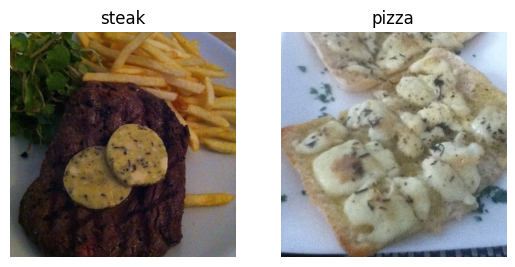

In [ ]:
# visulaize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Define directory path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
!nvidia-smi

Sun May  7 11:28:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

### 2. Create a CNN model (start with a baseline)

> A **baseline** is a relatively simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting you try to beat the baseline.

In [ ]:
# Import libraries and functions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf

In [ ]:
# Create the model (Baseline, a one layer Conv nn)
model_4 = Sequential([
    Conv2D(filters=10, # is the number of sliding windows going across an
           kernel_size=3, # the size sliding window going across an
           strides=1, # the size of the step the sliding window takes across an
           padding="valid", # if 'same', output shape is same as input, if "valid",
           activation="relu",
           input_shape=(224, 224, 3)), # Input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer
])


In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        # callbacks=[tensorboard_callback]
                        )

Epoch 1/5
47/47 [==============================] - 10s 131ms/step - loss: 0.7996 - accuracy: 0.5313 - val_loss: 0.6899 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6368 - accuracy: 0.6400 - val_loss: 0.6236 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4956 - accuracy: 0.7853 - val_loss: 0.4795 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3175 - accuracy: 0.8853 - val_loss: 0.4816 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.1954 - accuracy: 0.9393 - val_loss: 0.8118 - val_accuracy: 0.6980


### Evaluating our model

<Axes: xlabel='epochs'>

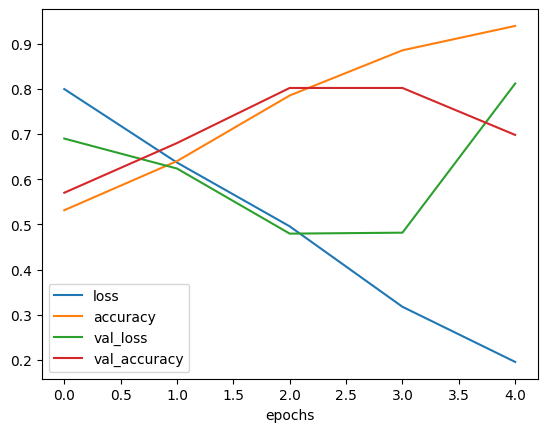

In [ ]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(xlabel="epochs")

In [ ]:
# PLot the validation and training curvees seperately
def plot_loss_curves(history):
  """
  Returns seperate Loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure() # Create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑**Note** When a model's **validation loss starts increaing**, it's likely that the model is **overfitting**. This means, it's learning the patterns in training dataset *Too well* and thus the model's ability to generalize to unseen data is diminished.

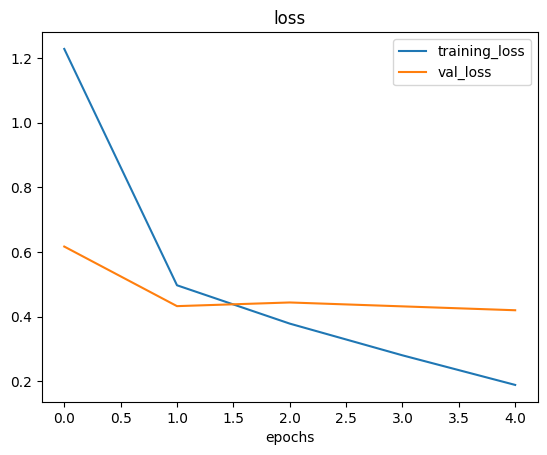

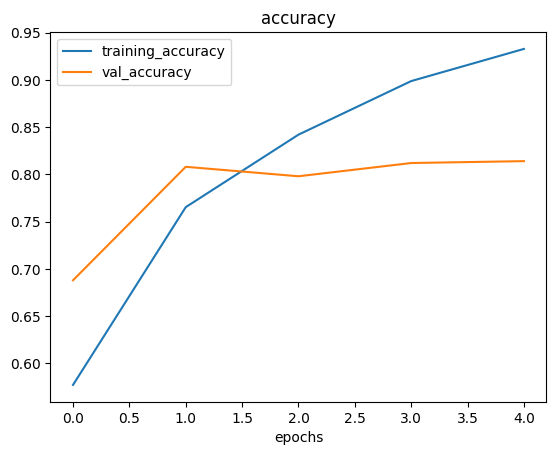

In [ ]:
# Check out the loss and training curves for model_4
plot_loss_curves(history_4)

### Adjust the model parameters

Fitting a machine learning model comes in steps:

0. Create a baseline
1. Beat the baseline
2. Reduce overfitting

Ways to induce Overfitting:\

* Increase the number of Conv layers (Make our nn deeper)
* Increase the number of Conv filters
* Add another Dense layer to the output of the flatten layer.

Reduce Overfitting:
* Add Data augmentation
* Add regularization layers (such as Maxpool2D)
* Add more Data

🔑: Reducing overfitting is aka **regularization**.

In [ ]:
# Create the model (new Baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                       validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 135ms/step - loss: 0.5811 - accuracy: 0.7013 - val_loss: 0.5826 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4865 - accuracy: 0.7793 - val_loss: 0.3981 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4208 - accuracy: 0.8167 - val_loss: 0.3692 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4097 - accuracy: 0.8253 - val_loss: 0.3798 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3850 - accuracy: 0.8413 - val_loss: 0.3499 - val_accuracy: 0.8320


In [ ]:
# Get the summary
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 10)       

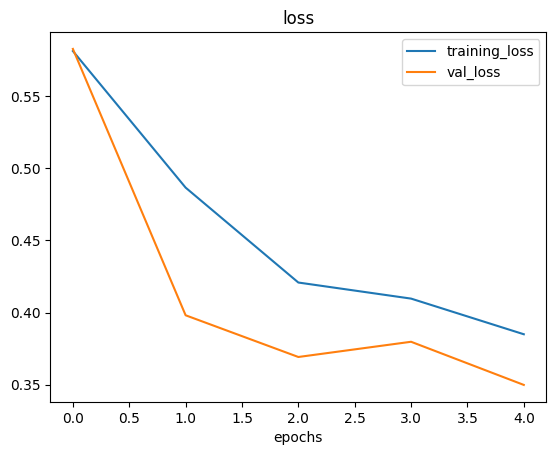

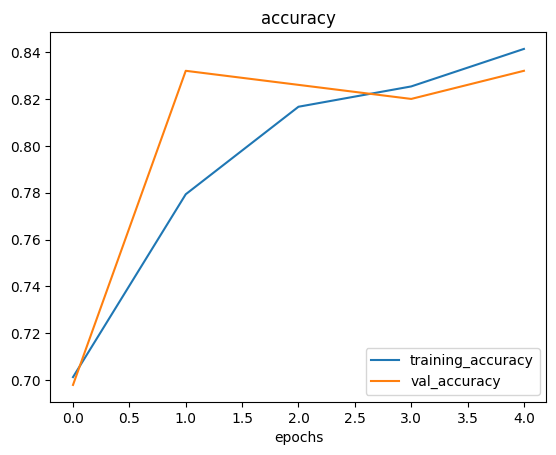

In [ ]:
# Plot the loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)


# Create ImageDataGenerator without Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator without Data Augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255)

> **Data Augmentation:** is the process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.

Altering might mean adjusting the rotation of an image, fliping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training dir
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purpose only

# Create non-aug train data batches
print("\nNon-Augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-aug test data batches
print("\nNon-Augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented training data:
Found 1500 images belonging to 2 classes.

Non-Augmented training data:
Found 1500 images belonging to 2 classes.

Non-Augmented test data:
Found 500 images belonging to 2 classes.


> 🔑**Note:** Data augmentation is usually only applied on training data. Using `ImageDatagenerator()` built-in data aug parameters, our images are left as they are in the dirs but modified as they're loaded into model.

### Visualizing augmented Data

In [ ]:
# Get sample data batches
images, labels = train_data.next()

# Underscore cuz labels would be the same as shuffle is False
aug_images, _ = train_data_augmented.next() # Labels aren't augmented.. only data images

Showing image number: 4


(-0.5, 223.5, 223.5, -0.5)

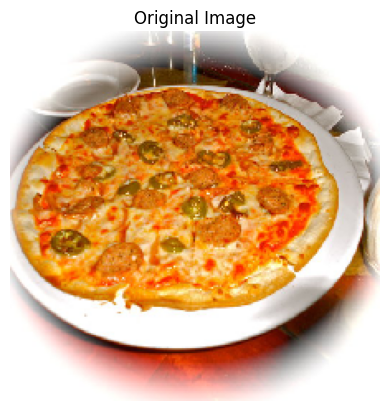

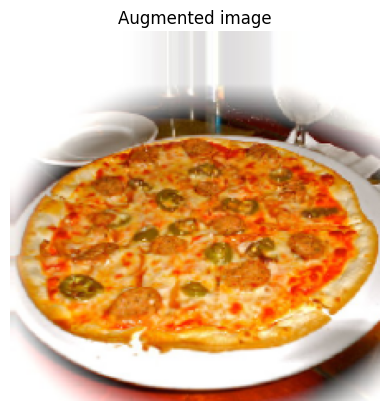

In [ ]:
# Show the original vs augmented image
import random
random_number = random.randint(0, 32) # batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title("Augmented image")
plt.axis(False)

### Buildig A model with Augmeted Data

In [ ]:
# Create the  model
model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10 , 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10 , 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 492ms/step - loss: 0.7096 - accuracy: 0.4180 - val_loss: 0.6900 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6925 - accuracy: 0.4873 - val_loss: 0.6889 - val_accuracy: 0.6680
Epoch 3/5
47/47 [==============================] - 27s 564ms/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6929 - accuracy: 0.4953 - val_loss: 0.6857 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6920 - accuracy: 0.5133 - val_loss: 0.6842 - val_accuracy: 0.5520


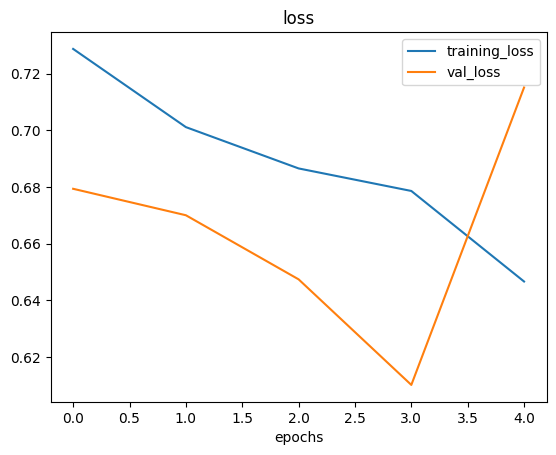

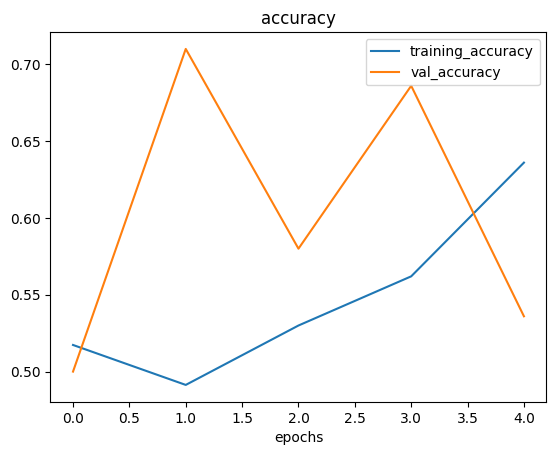

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

This model starts with a very low accuracy, that because the shuffle was flase in our training data hence no randomness.

### Shuffling the Data (Important to go through)

In [ ]:
# Creating a data with shuffle True
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(0.0005),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 494ms/step - loss: 0.6659 - accuracy: 0.5807 - val_loss: 0.5720 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5777 - accuracy: 0.7047 - val_loss: 0.4800 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5183 - accuracy: 0.7560 - val_loss: 0.3788 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 23s 496ms/step - loss: 0.4703 - accuracy: 0.7720 - val_loss: 0.3536 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 23s 500ms/step - loss: 0.4667 - accuracy: 0.7853 - val_loss: 0.3501 - val_accuracy: 0.8580


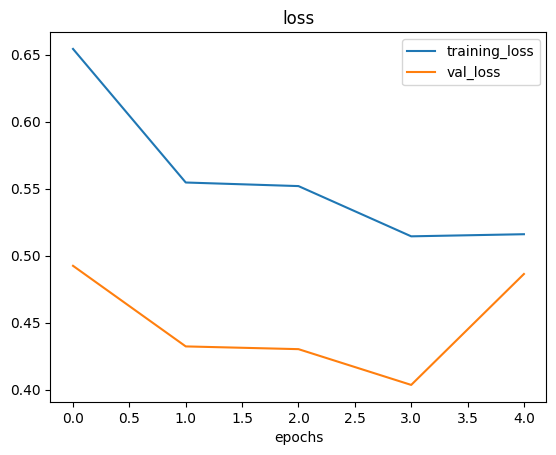

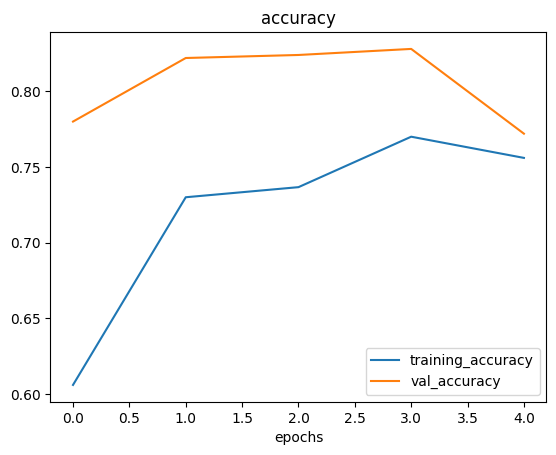

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

>🔑👀 Importance of **Shuffling Data:** Notice after shuffling the dat, model's accuracy improved quite fast that is because when the data was not shuffled: **The model first went through the images of pizza first and adjusted its params for the features of pizza, and then when the images of steak came(losses all accuracy) it had to adjust its params again for steaks till the end. So in the next epoch again it met pizza(lost previous learned features in the chase of steak acc) data which made the model's learning hard as its previous features Faltered.**

### Improving Till Satisfied


A few things that might help improving our model:

* Increase the layers (e.g. Add more `Conv2D`/`MaxPool2D` layers)
* Increase the num of Filters in each Conv layer (Some common nums 10, 32, 64)
* Train for more epochs
* Find an ideal learning rate
* Get more Data
* Use **Transfer learning** to leverage what another image model has learn and adjust it for our own use case.   

In [ ]:
# Recreating the CNN explainer model
model_8 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(0.0001),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled, epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 553ms/step - loss: 0.6892 - accuracy: 0.5140 - val_loss: 0.6789 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6717 - accuracy: 0.6600 - val_loss: 0.6348 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6236 - accuracy: 0.6940 - val_loss: 0.5406 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5748 - accuracy: 0.7113 - val_loss: 0.4837 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5611 - accuracy: 0.7240 - val_loss: 0.4536 - val_accuracy: 0.8160


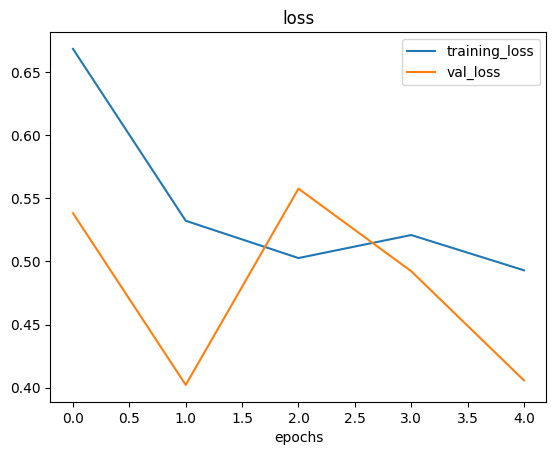

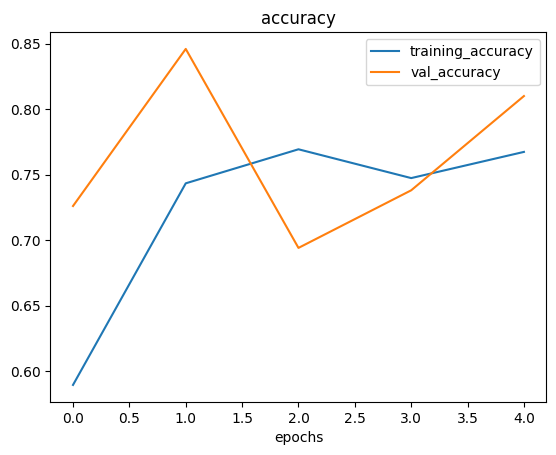

In [ ]:
plot_loss_curves(history_8)

## Making prediction with trained model on a custom data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")

--2023-05-11 17:43:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-05-11 17:43:41 (203 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

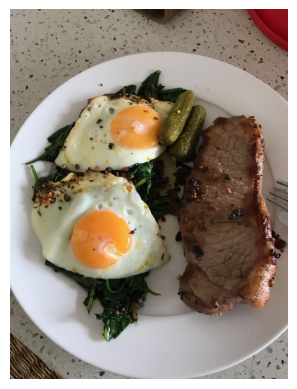

In [ ]:
plt.imshow(steak)
plt.axis(False)

### Expecting batch size as a dimension

> Since model 7 performed better so i am gonna use that for predictions.

In [ ]:
model_7.predict(steak)

In [ ]:
# Expanding dimension
model_7.predict(tf.expand_dims(steak, axis=0))



> The input shape is valid. We need to reshape our custom data.



In [ ]:
# Create a function to import and resize an image to be able to use with our model.
def load_and_prep_img(filename, img_shape=224):
  """
  Read an image and turns it into tensor and reshapes it.
  """

  # Read in the img
  img = tf.io.read_file(filename) # io=input and output
  # Decode the read into a tensor
  img = tf.image.decode_image(img)
  # Resize the img
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the img
  img = img/255.

  return img

In [ ]:
steak = load_and_prep_img("03-steak.jpeg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0)) # Expand dims cuz batch's dimension expected

1/1 [==============================] - 0s 152ms/step


### Visualizing the Prediction

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the pred probb and indexig it on the class names
pred_class = class_names[int(tf.round(pred))]

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  # import the target img and preprocess it
  img = load_and_prep_img(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0)) # adding Batch's dimension to this custom img
  print(pred)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # PLot the img and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 32ms/step


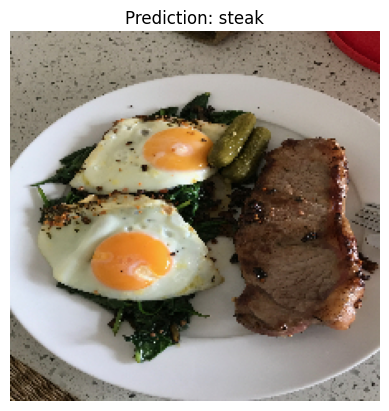

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")